In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import acf

from IPython.display import display, HTML
display(HTML(""" <style> .output {display: center; align-items: left; text-align: center; justify-content: center; } </style> """))

In [2]:
#Importación de datos
#data = pd.read_excel('Generación Intermitente de la GCROC 2013-2019.xlsx', header=1)
datos = pd.read_excel('plantas_intermitentes_clean.xlsx', header=1)
datos.head()

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
0,1,jueves,2013-11-14,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 01:00:00
1,2,jueves,2013-11-14,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 02:00:00
2,3,jueves,2013-11-14,3,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 03:00:00
3,4,jueves,2013-11-14,4,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 04:00:00
4,5,jueves,2013-11-14,5,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 05:00:00


In [3]:
datos.tail()

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
46819,46820,lunes,2019-03-18,20,31368,36054.0,51098.0,80381.0,108298.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 20:00:00
46820,46821,lunes,2019-03-18,21,31368,106540.0,78322.0,62865.0,91574.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 21:00:00
46821,46822,lunes,2019-03-18,22,45247,103049.0,75092.0,61188.0,57110.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 22:00:00
46822,46823,lunes,2019-03-18,23,25575,92652.0,80384.0,60256.0,29338.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 23:00:00
46823,46824,lunes,2019-03-18,24,6344,120661.0,83692.0,35103.0,13816.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-19 00:00:00


In [4]:
#LIMPIEZA DE DATOS
datos = datos.set_index(datos['fecha_hora'])
datos = datos[44976:]
datos

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
fecha_hora,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,44977,martes,2019-01-01,1,989,59570.0,76442.0,2672.0,75567.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 01:00:00
2019-01-01 02:00:00,44978,martes,2019-01-01,2,316,30907.0,44403.0,1729.0,62964.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 02:00:00
2019-01-01 03:00:00,44979,martes,2019-01-01,3,906,15816.0,61611.0,1225.0,58392.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 03:00:00
2019-01-01 04:00:00,44980,martes,2019-01-01,4,3404,17314.0,59586.0,4105.0,72198.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 04:00:00
2019-01-01 05:00:00,44981,martes,2019-01-01,5,1530,14027.0,46828.0,3710.0,66754.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-18 20:00:00,46820,lunes,2019-03-18,20,31368,36054.0,51098.0,80381.0,108298.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 20:00:00
2019-03-18 21:00:00,46821,lunes,2019-03-18,21,31368,106540.0,78322.0,62865.0,91574.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 21:00:00
2019-03-18 22:00:00,46822,lunes,2019-03-18,22,45247,103049.0,75092.0,61188.0,57110.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 22:00:00


In [5]:
columns = ['GICIE301','GICIE302', 'GICIE303', 'GICIE304', 'GICIE305', 'GICIS306', 'GICIS307','GICIS308', 
           'GICIS309', 'GICIS310', 'GICIS311', 'GICIS312', 'GICIS313','GICIS314', 'GICIS315', 'GICIS316']
len(columns)

16

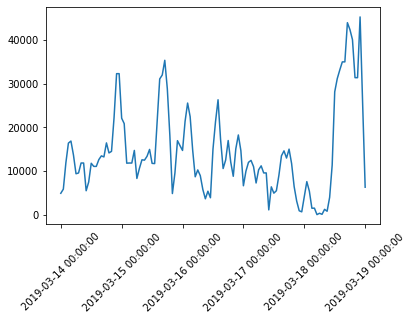

In [6]:
plt.plot(datos['GICIE301'][-1-5*24:])
plt.xticks([0,24,48,72,96,120],rotation=45)
plt.show()

In [7]:
def mape(forecast, actual):
    return np.mean(np.abs((forecast - actual)/actual))  # MAPE

In [8]:
def AIC_accuracy(train,test):
    fcc = []
    for i in range(1,25):
        data = train['Hora '+str(i)].dropna()
        model = pm.auto_arima(data.values, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=12,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=True,   # No Seasonality
                          start_P=0, 
                          D=0, 
                          trace=False,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
        #model.fit(data.values)
        #print(model)
        #model.plot_diagnostics(figsize=(7,5))
        #plt.show()
        # Predicción
        fc, confint = model.predict(n_periods=len(test), return_conf_int=True)
        fcc.append(fc)
    return(fcc, model)

In [9]:
def mape_prom_edited(columna):
    
    data2 = datos[['hora',columna]]
    data2[columna] = (data2[columna]+1) # para efectos de las tranformaciones logaritmicas(eliminar el 0)
    #data2 = data2.dropna()

    #Se separará por hora del día, ya que cada hora se comporta diferente.
    xhr = pd.DataFrame() ; log = pd.DataFrame() ; rends = pd.DataFrame() ; rlogs = pd.DataFrame()
    ano,dia,hora= str(data2.index[1])[0:4], str(data2.index[1])[5:7] ,str(data2.index[1])[8:10]

    #El siguiente ciclo 'for' crea un DataFrame acomodado por horas, de cada planta de generación.
    for i in range(1,25):
        hrs = [data2.iloc[j][1] for j in range(len(data2)) if data2.iloc[j][0] == i ] #pd.Series()
        xhr['Hora '+str(i)] = hrs

    #Se va a trabajar con logaritmicos, porque esta transformación no afecta el vlaor, sino solo su rango.
    log = np.log(xhr)

    #Se le cambia el index a los DataFrame creados, por las fechas que son.
    xhr = xhr.set_index(pd.date_range(start=datos['fecha'][0],end=datos['fecha'][-1],freq='d'))

    #Seleccion de y_train y y_test
    test = (xhr.iloc[-5:,:])-1   # INFO DE TEST
    train = log.drop(log.index[1945:]) # QUITANDO TEST PARA TRAIN

    fcc = []

    #MODELO ARIMA
    for i in range(1,25):
        y_train = train['Hora '+str(i)].dropna()
        model = pm.auto_arima(y_train.values, start_p=1, start_q=1,
            test='adf',       # use adftest to find optimal 'd'
            max_p=3, max_q=3, # maximum p and q
            m=1,              # frequency of series
            d=None,           # let model determine 'd'
            seasonal=True)   # No Seasonality

        model.fit(y_train.values)
        #print(model)
        #model.plot_diagnostics(figsize=(7,5))
        #plt.show()
            
        # Predicción
        fc, confint = model.predict(n_periods=len(test), return_conf_int=True)
        fcc.append(fc)
        
    fc, model = AIC_accuracy(train,test)
    mapes = [mape(fc[i-1], np.log(test['Hora '+str(i)])) for i in range(1,25)]
    mapes = pd.DataFrame(mapes).dropna()
    mape_promedio = np.mean(mapes)
    dias = []
    for j in range(0,5):
        dias.append([np.exp([ fc[i][j] for i in range(len(fc))])][0])
    pronostico = pd.DataFrame(np.concatenate(dias))
    pronostico = pronostico.set_index(pd.date_range(pd.datetime(2019,3,14),periods=len(pronostico),freq='H'))
    pronostico.index = pronostico.index.map(str)

    arange_dates = []
    arange_no = []
    arange = data[columna][-1-19*24:].index
    for i in range(0,len(arange),48):
        arange_dates.append(arange[i])
        arange_no.append(i)

    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(data[columna][-1-19*24:], label = 'Datos Reales')
    plt.plot(pronostico, label='pronostico')
    plt.title('Predicción vs Reales 5 dias '+columna)
    plt.xticks(arange_no,arange_dates,rotation = 45)
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    
    print(mape_promedio)
    #print(fc)
    #print(model)

In [ ]:
import time
t1=time.time()
speed = []

prueba1 = [mape_prom_edited(columns[5])]
prueba1

t2 = time.time()
print("Toma {} segundos".format(t2-t1))
speed.append(t2-t1)

In [ ]:
import time
t1=time.time()
speed = []

prueba1 = [mape_prom_edited(columns[i]) for i in range(0,1)]
prueba1

t2 = time.time()
print("Toma {} segundos".format(t2-t1))
speed.append(t2-t1)

In [ ]:
eolicas = [mape_prom_edited(columns[i]) for i in range(0,5)]
eolicas

In [ ]:
import time
t1=time.time()
speed = []

solares = [mape_prom_edited(columns[i]) for i in range(5,17)]

t2 = time.time()
print("Toma {} segundos".format(t2-t1))
speed.append(t2-t1)

solares

In [ ]:
#La unica planta que no corre es GICIS312.

***

# PM.ARIMA TESTS:

https://alkaline-ml.com/pmdarima/usecases/sun-spots.html

In [ ]:
log = np.log(xhr['Hora 1'])
log

In [ ]:
train_len = 1940
y_train, y_test = train_test_split(log, train_size=train_len)
y_train

In [ ]:
y_test

In [ ]:
fit1 = pm.auto_arima(y_train, m=1, trace=True, suppress_warnings=True)

In [ ]:
fit1.summary()

In [ ]:
from pmdarima.preprocessing import LogEndogTransformer

y_train_log, _ = LogEndogTransformer(lmbda=1e-6).fit_transform(y_train)
tsdisplay(y_train_log, lag_max=100)

In [ ]:
from pmdarima.preprocessing import BoxCoxEndogTransformer

y_train_bc, _ = BoxCoxEndogTransformer(lmbda2=1e-6).fit_transform(y_train)
tsdisplay(y_train_bc, lag_max=100)

In [ ]:
from scipy.stats import normaltest
normaltest(y_train_bc)[1]
# 2.5138201352932145e-41

In [ ]:
from pmdarima.pipeline import Pipeline

fit2 = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           m=12))
])

fit2.fit(y_train)

In [ ]:
fit2.summary()

In [ ]:
forecast = fit2.predict(10)
forecast

In [ ]:
y_test

In [ ]:
from sklearn.metrics import mean_squared_error as mse


def plot_forecasts(forecasts, title, figsize=(8, 12)):
    x = np.arange(y_train.shape[0] + forecasts.shape[0])

    fig, axes = plt.subplots(2, 1, sharex=False, figsize=figsize)

    # Plot the forecasts
    axes[0].plot(x[:y_train.shape[0]], y_train, c='b')
    axes[0].plot(x[y_train.shape[0]:], forecasts, c='g')
    axes[0].set_xlabel(f'Sunspots (RMSE={np.sqrt(mse(y_test, forecasts)):.3f})')
    axes[0].set_title(title)

    # Plot the residuals
    #resid = y_test - forecasts
    #_, p = normaltest(resid)
    #axes[1].hist(resid, bins=15)
    #axes[1].axvline(0, linestyle='--', c='r')
    #axes[1].set_title(f'Residuals (p={p:.3f})')

    plt.tight_layout()
    plt.show()

In [ ]:
# Comando para interactuar con las gráficas
#%matplotlib notebook

# Comando para no interactuar mas con las gráficas
%matplotlib inline

In [ ]:
plot_forecasts(forecast,"test")

In [ ]:
plt.plot(y_train.values[-1-5*24:])
plt.plot(y_test.values)
plt.plot(forecast)

***